Lab Probability Distributions
In this lab we will look at probability distributions

In [1]:
from scipy.stats import norm, pareto
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import auc
from matplotlib.patches import Polygon

[-10.     -9.999  -9.998 ...   9.997   9.998   9.999]
[7.43359757e-07 7.45220389e-07 7.47085490e-07 ... 7.48955072e-07
 7.47085490e-07 7.45220389e-07]


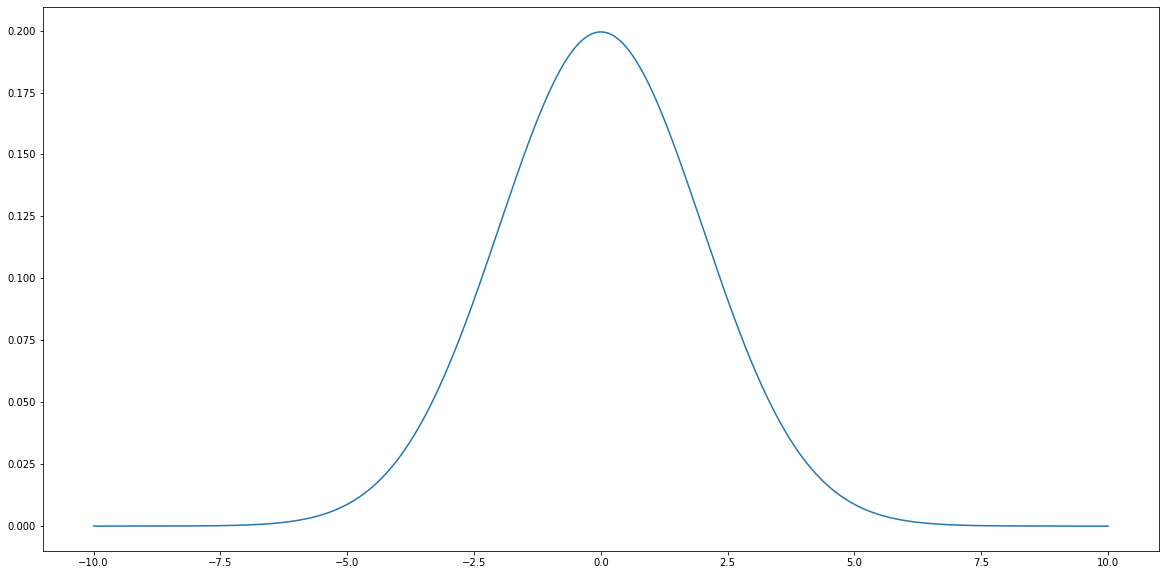

Probability value for the full range of x values is 1.00


In [2]:
np.random.seed(1)
ax=plt.subplots(figsize=(20,10))

x_range = np.arange(-10,10,0.001) ## Use arange and get values between -10 and 10 with a difference of 0.001 between each point
prob = norm.pdf(x_range,scale=2,loc=0)## Using norm from scipy calcuate the pdf for the x_range generated above. Use mean = 0 and std = 2
print(x_range)
print(prob)
prob_auc = auc(x_range,prob) ## Calcuate the area under the curve using auc function, read the docs for the inputs
plt.plot(x_range, prob)
plt.show()

print("Probability value for the full range of x values is {:.2f}".format(prob_auc))

1


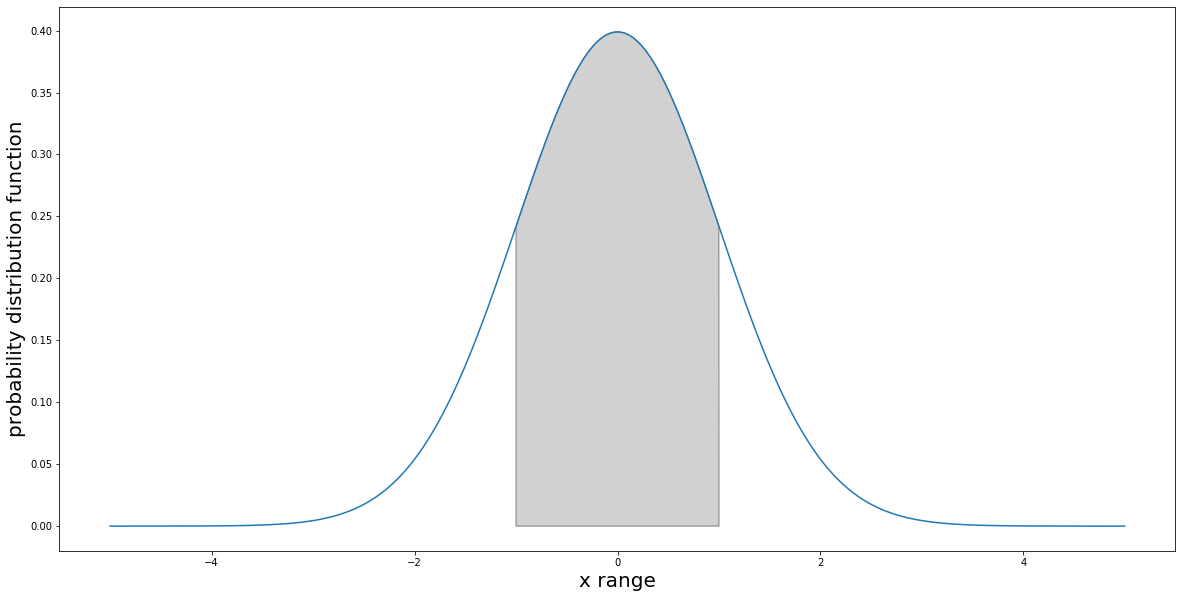

Area under the curve 68.24%


In [3]:
# You will be using this function repeatedly  
def plot_normal(mean, std, num_std, x_val, plot_off=False):

    np.random.seed(1)

    x_range = np.arange(-x_val, x_val, 0.001)
    prob = norm.pdf(x_range, scale=std, loc=mean)

    xval_auc = np.dot(num_std,std)+mean ## You need to add the product of the num_std and std to the mean 
    print(xval_auc)
    x_range_auc = np.arange(-xval_auc, xval_auc, 0.001) ## We need a range of values from -xval_auc to +xval_auc with division of 0.001 
    prob_auc = norm.pdf(x_range_auc,scale=std,loc=mean) ## Get the probability distribution function values for x_range_auc, remember same mean and std
               ## as our normal distribution 
    verts = [(-xval_auc, 0)] + list(zip(x_range_auc, prob_auc)) + [(xval_auc, 0)]
    poly = Polygon(verts, facecolor='0.82', edgecolor='0.5', alpha =1.0)
    
    auc_value = auc(x_range_auc, prob_auc)
    if plot_off == True: 
        fig, ax = plt.subplots(figsize=(20,10))
        ax.add_patch(poly)
        plt.plot(x_range, prob)
        plt.xlabel("x range", fontsize=20)
        plt.ylabel("probability distribution function", fontsize=20)
        plt.show()

    print("Area under the curve {:.2f}%".format(auc_value*100.0))

    return None 

mean = 0 
std = 1 
num_std = 1
x_val = 5

plot_normal(mean, std, num_std, x_val, plot_off=True)

In [4]:
mean = 0
std = 1 
num_std = [1, 2, 3]
#num_std=1
#x_val = 5
for i in num_std:
    plot_normal(mean,std,i,x_val,plot_off=False)
#for a in num_std:
 #   plot_normal(mean,std,num_std=a,x_val)
    
#for i in mean,std,num_std,x_val:
plot_normal(0,1,1,5,plot_off=False)
plot_normal(0,1,2,5,plot_off=False)
plot_normal(0,1,3,5,plot_off=False)
#print("Area under the curve{.2f}".format(auc_value*100.0))
## Write a for loop to where you print the result of function plot_normal. 
## Check the input values of the function and ensure that you turn off the plotting. 
## All we need to do is to print the statements below
## Approximately 2-3 lines of code

1
Area under the curve 68.24%
2
Area under the curve 95.44%
3
Area under the curve 99.73%
1
Area under the curve 68.24%
2
Area under the curve 95.44%
3
Area under the curve 99.73%


Part 3: Plotting the Pareto Distribution
One of the most common distributions that you might encounter will be the Pareto distribution. It is the foundation of the 80-20 rule. The 80-20 rule in product sales states that 80% of your sales will come from 20% of you customers. In this part, we are going to plotting the Pareto distribution to see how it looks.

The the Pareto distribution has two parameters,  𝑥𝑚  and  𝛼  where: 1)  𝑥𝑚  is the minimum starting value. If  𝑥𝑚  is less than 1 we set x_m = 1. This also means that  𝑥𝑚  must always take positive values. If  𝑥𝑚  > 1 then we the Pareto distribution is -
𝑃=(𝑥𝑚𝑥)𝛼
 
2) The exponent  𝛼  is an always positive value. It controls how quickly the function decays.

Let us code up an example using scipy.

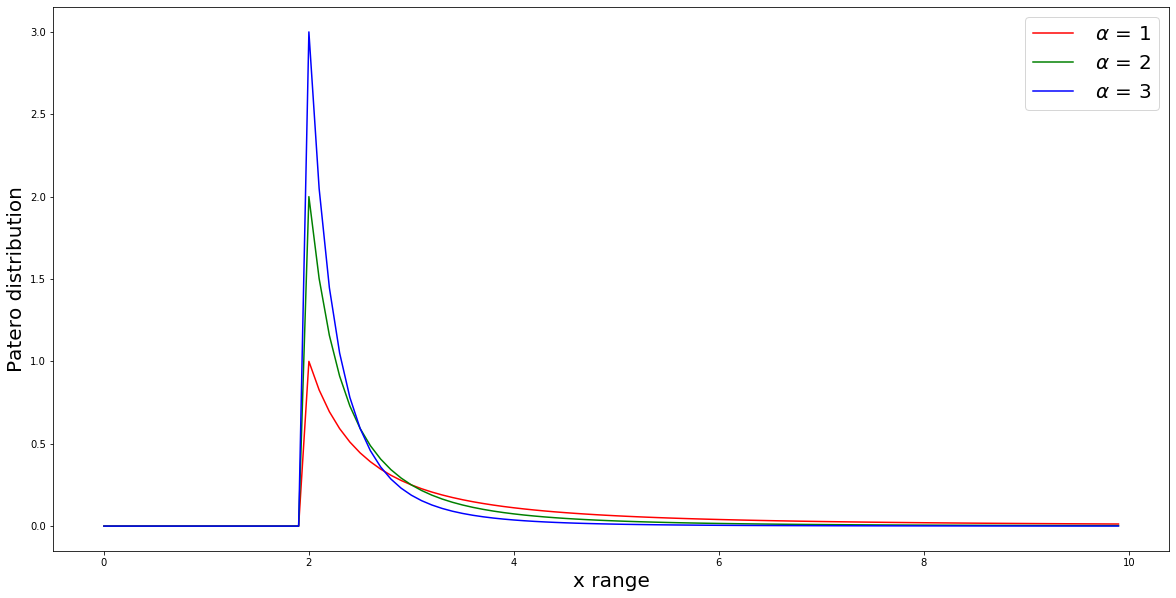

In [5]:
alpha = [1, 2, 3]
x_m = 1.0 
x_range = np.arange(0, 10, 0.1)
legend =  ( r" $\alpha$ = 1", 
            r" $\alpha$ = 2", 
            r" $\alpha$ = 3")

colors = ['red', 'green', 'blue']
plt.figure(figsize=(20,10))
for indx,x in enumerate(alpha):
    pareto_dist=pareto.pdf(x_range,x,x_m)
    plt.plot(x_range,pareto_dist,color=colors[indx])
    #pareto_dist = np.array([pareto.pdf(x=x_range,b=a,loc=0,scale=x_m)])
    #plt.plot(x_range,pareto_dist.T,label='alpha {0}'.format(a))
## Enumerate over (loop over using enumerate) alpha and get values for the Patero probability density function. 
## The x range of the distribution is given by x_range and parameters are also given above
## Plot the distribution as a line plot in the for loop, ensure that you call the Patero distribution as 
## patero_dist. 
## Make sure that you index over the colors when you plot as well. 
## Approximately 3 lines of code

plt.xlabel("x range", fontsize=20)
plt.ylabel("Patero distribution", fontsize=20)
plt.legend(legend, fontsize=20 )
plt.show()
